In [1]:
import pandas as pd
import openml
import data_preprocess as dp

data_name = 'bank32nh'

data = openml.datasets.get_dataset(833)

X, y, categorical_indicator, attribute_names = data.get_data(
    target=data.default_target_attribute, dataset_format="dataframe"
)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


# Data Preprocessing

In [2]:
from copy import deepcopy
import numpy as np

nominal = [b for a, b in zip(categorical_indicator, attribute_names) if a]
numerical = [b for a, b in zip(categorical_indicator, attribute_names) if not a]

'''
encoded_data = pd.get_dummies(X, columns=nominal)
columns = encoded_data.columns
updates = {}
for col in columns:
    if any(x in col for x in set((',', '[', ']', '<', '>'))):
        updates[col] = col.replace(',', '_').replace('[', '_').replace(']', '_').replace('<', 'less').replace('>', 'greater')
encoded_data = encoded_data.rename(columns=updates)

encoded_data.fillna(0, inplace=True)
encoded_data
'''

encoded_data = deepcopy(X)

for col in nominal:
    
    mapping = {c: i+1 for i, c in enumerate(encoded_data[col].unique())}
    encoded_data[col] = encoded_data[col].replace(mapping)
    try:
        encoded_data[col] = encoded_data[col].cat.add_categories([0])
    except:
        continue

encoded_data = encoded_data[numerical + nominal]
encoded_data.fillna(0, inplace=True)
encoded_data

,a1cx,a1cy,a1sx,a1sy,a1rho,a1pop,a2cx,a2cy,a2sx,a2sy,...,b1eff,b2x,b2y,b2call,b2eff,b3x,b3y,b3call,b3eff,mxql
0,0.413010,0.607442,0.332608,0.406812,-0.151224,1.525222,-0.144368,0.852368,0.412397,1.728169,...,1.974706,-0.776759,-0.783770,8,0.603486,-0.997118,-0.502138,5,1.169388,9
1,-0.602384,0.350618,0.429196,0.414476,-0.124489,4.597991,0.579458,0.651134,0.104394,0.636356,...,0.798979,-0.002820,-0.080542,2,1.125542,-0.983397,-0.107632,5,1.186039,7
2,-0.322881,-0.538491,1.602260,0.039605,0.196023,1.909005,-0.675672,0.963618,0.147458,1.414008,...,0.577355,-0.952645,-0.571600,5,1.280392,0.771129,-0.665756,5,1.024203,6
3,-0.233570,-0.936451,1.710192,2.179527,0.438461,4.742055,-0.163625,-0.923273,0.597622,0.118409,...,0.760084,-0.198235,-0.205276,2,0.509727,-0.579544,0.480094,6,1.568492,7
4,0.403126,0.313367,0.822382,1.393975,0.253435,9.398630,0.312528,0.288321,0.431867,0.110369,...,1.170067,0.573352,0.315217,2,0.622033,-0.134747,0.669948,3,1.295913,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8187,0.574602,0.838725,0.413666,0.106538,-0.234311,1.826603,-0.812191,-0.641247,0.032074,0.311381,...,1.770834,0.458032,-0.252926,2,1.300314,0.265640,0.075141,2,1.061276,7
8188,-0.328542,0.431295,1.871342,0.195284,-0.454419,1.266566,0.074520,-0.233416,0.967483,0.902844,...,1.019917,-0.943163,0.184895,3,0.760308,0.184409,0.313283,2,1.790066,7
8189,0.941521,-0.820731,1.055311,0.186861,-0.184692,2.716994,0.965042,0.328241,0.138787,0.502774,...,0.847430,0.935832,0.289506,5,1.714573,0.216543,-0.763388,6,1.153544,7
8190,0.206743,0.916655,0.265062,0.666585,0.027745,5.556948,-0.869593,-0.703412,2.032233,0.779990,...,1.199289,-0.104562,0.752754,6,0.561357,0.908959,-0.137524,5,1.392110,9


In [3]:
'''
categorical = set()
for cat in nominal:
    for category in X[f'{cat}'].unique():
        categorical.add(f'{cat}_{category}')
categorical
'''
y.unique()

['P', 'N']
Categories (2, object): ['P' < 'N']

In [4]:
mapping = {b: i for i, b in enumerate(y.unique())}


y = y.replace(mapping)
#y = pd.get_dummies(y)
y

0       0
1       1
2       0
3       1
4       0
       ..
8187    0
8188    0
8189    0
8190    0
8191    0
Name: binaryClass, Length: 8192, dtype: int64

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

train_data, left_out, train_label, y_left_out = train_test_split(encoded_data, y, test_size=0.3, random_state=42)
test_data, dev_data, test_label, dev_label = train_test_split(left_out, y_left_out, test_size=0.5, random_state=42)

print(f'train shape: {train_data.shape}\n test shape: {test_data.shape}\n dev shape: {dev_data.shape}')

train shape: (5734, 32)
 test shape: (1229, 32)
 dev shape: (1229, 32)


In [6]:
from copy import deepcopy

r_train_data = deepcopy(train_data)

In [7]:
from sklearn.preprocessing import Normalizer, StandardScaler

nn = StandardScaler()

nn.fit(train_data[numerical])

train_data[numerical] = nn.transform(train_data[numerical])
dev_data[numerical] = nn.transform(dev_data[numerical])
test_data[numerical] = nn.transform(test_data[numerical])

In [8]:
len(train_label), len(test_label), len(dev_label)

(5734, 1229, 1229)

# Build graph

In [9]:
index_to_name, name_to_index = dp.name_index(data=r_train_data)

In [10]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(train_data, train_label)

In [11]:
train = dp.transform_to_tensors(X_over, y_over, len(index_to_name))

test = dp.transform_to_tensors(test_data, test_label, len(index_to_name))

dev = dp.transform_to_tensors(dev_data, dev_label, len(index_to_name))

torch.Size([7902, 32])
torch.Size([7902])
torch.Size([1229, 32])
torch.Size([1229])
torch.Size([1229, 32])
torch.Size([1229])


In [12]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(train_data, train_label)

In [13]:
from torch.utils.data import DataLoader
import torch

batch_size = 64

train_dataset = dp.Data(data=train)
val_dataset = dp.Data(data=dev)
test_dataset = dp.Data(data=test)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=False)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, drop_last=False)

# Train IGNNet

In [14]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, f1_score

In [15]:
import torch
from kanshap import train_model, KANSHAP
torch.manual_seed(1)

'''
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

adj_matrix = torch.FloatTensor(adj_matrix)

gnn_model = IGNNet(adj_matrix[0].shape[0], adj_matrix.to(device), 3, index_to_name, dataframe=train_data, 
            categorical=nominal, 
            numerical=numerical,).to(device)

gnn_model.load_state_dict(torch.load(f'{data_name}/epoch[100]-0.872.model'))

optimizer_train = torch.optim.Adam(gnn_model.parameters(), lr=1e-03)

optimizer_train.load_state_dict(torch.load(f'{data_name}/epoch[100]-0.872.optm'))
'''

gnn_model = train_model(index_to_name=index_to_name,
            train_dataloader=train_dataloader,
            val_dataloader=val_dataloader,
            data_name=data_name,
            num_classes=1,
            dataframe=encoded_data, 
            categorical=nominal, 
            numerical=numerical,
            gnn_model=None, 
            optimizer_train=None, 
            current_epoch=1,
            max_num_epochs=300,
            learning_rate=1e-03,
            num_samples=32,
            alpha=1, beta=10,
            patience=10)


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|███████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 15.88it/s]


BCE loss: 0.4808279871940613
interpretability MSE loss: 0.5320406556129456
Acc at dev is : 0.777
ROC is : 0.791,  prec 0.7585624367340785,  recall 0.7911543405240884, f-score 0.7632270965637111
Acc at epoch : 1 is : 0.7126044034957886, loss : 187.89419788122177


100%|███████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 15.74it/s]


BCE loss: 0.4474174380302429
interpretability MSE loss: 0.15214577317237854
Acc at dev is : 0.786
ROC is : 0.793,  prec 0.7635364597245011,  recall 0.793120278414396, f-score 0.7702325277215611
Acc at epoch : 2 is : 0.8014426827430725, loss : 86.27472838759422


100%|███████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 18.24it/s]


BCE loss: 0.3971484899520874
interpretability MSE loss: 0.5236657857894897
Acc at dev is : 0.828
ROC is : 0.786577,  prec 0.8099629483900583,  recall 0.7865767519128863, f-score 0.7961804515769509
Acc at epoch : 3 is : 0.8191596865653992, loss : 75.02565068006516


100%|███████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 18.83it/s]


BCE loss: 0.44245949387550354
interpretability MSE loss: 0.09306016564369202
Acc at dev is : 0.801
ROC is : 0.807,  prec 0.7775290406322396,  recall 0.8072365309760268, f-score 0.7851614758326728
Acc at epoch : 4 is : 0.8291571736335754, loss : 65.84065616130829


100%|███████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 19.09it/s]


BCE loss: 0.42411941289901733
interpretability MSE loss: 0.09398547559976578
Acc at dev is : 0.799
ROC is : 0.792,  prec 0.7717068274224745,  recall 0.7921259412856052, f-score 0.7789923999356408
Acc at epoch : 5 is : 0.8453556299209595, loss : 55.602672189474106


100%|███████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 18.42it/s]


BCE loss: 0.4378181993961334
interpretability MSE loss: 0.09959547966718674
Acc at dev is : 0.808
ROC is : 0.804690,  prec 0.781746699184257,  recall 0.8046900578413183, f-score 0.7896207364768415
Acc at epoch : 6 is : 0.861807107925415, loss : 52.560942590236664


100%|███████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 17.31it/s]


BCE loss: 0.41588515043258667
interpretability MSE loss: 0.17712752521038055
Acc at dev is : 0.824
ROC is : 0.802785,  prec 0.7981747510209931,  recall 0.8027847502637419, f-score 0.8003753902795575
Acc at epoch : 7 is : 0.8816755414009094, loss : 49.38347026705742


100%|███████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 19.00it/s]


BCE loss: 0.4339653551578522
interpretability MSE loss: 0.09398011863231659
Acc at dev is : 0.810
ROC is : 0.803179,  prec 0.7834690082878879,  recall 0.8031788472964944, f-score 0.7908375424103311
Acc at epoch : 8 is : 0.8976208567619324, loss : 55.74305239319801


100%|███████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 17.57it/s]


BCE loss: 0.41901129484176636
interpretability MSE loss: 0.11390795558691025
Acc at dev is : 0.816
ROC is : 0.800094,  prec 0.7887497520622586,  recall 0.8000942801362969, f-score 0.7937086309134769
Acc at epoch : 9 is : 0.9148316979408264, loss : 44.312922567129135
Epoch 00009: reducing learning rate of group 0 to 5.0000e-04.


100%|███████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 18.20it/s]


BCE loss: 0.4370655417442322
interpretability MSE loss: 0.1086159497499466
Acc at dev is : 0.810
ROC is : 0.794568,  prec 0.7825174886171344,  recall 0.7945678271308523, f-score 0.7877008118846087
Acc at epoch : 10 is : 0.9392558932304382, loss : 39.91687402129173


100%|███████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 17.83it/s]


BCE loss: 0.44181498885154724
interpretability MSE loss: 0.10465782880783081
Acc at dev is : 0.817
ROC is : 0.794071,  prec 0.7899516968860034,  recall 0.7940706585664569, f-score 0.7919245427832937
Acc at epoch : 11 is : 0.9457099437713623, loss : 37.825216084718704


100%|███████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 18.03it/s]


BCE loss: 0.44335857033729553
interpretability MSE loss: 0.11724039167165756
Acc at dev is : 0.815
ROC is : 0.787571,  prec 0.7887264570169351,  recall 0.7875710890416773, f-score 0.7881422282568662
Acc at epoch : 12 is : 0.9538091421127319, loss : 36.411593064665794


100%|███████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 17.96it/s]


BCE loss: 0.4512065052986145
interpretability MSE loss: 0.10260802507400513
Acc at dev is : 0.806
ROC is : 0.778981,  prec 0.7782474345252133,  recall 0.7789812894854912, f-score 0.7786115215074598
Acc at epoch : 13 is : 0.9584915041923523, loss : 35.27377012372017
Epoch 00013: reducing learning rate of group 0 to 2.5000e-04.


100%|███████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 18.32it/s]


BCE loss: 0.4595947861671448
interpretability MSE loss: 0.10264462232589722
Acc at dev is : 0.819
ROC is : 0.796596,  prec 0.7917213310274912,  recall 0.7965959110917094, f-score 0.7940375676823243
Acc at epoch : 14 is : 0.9667173027992249, loss : 33.192924067378044


100%|███████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 18.51it/s]

BCE loss: 0.45824533700942993
interpretability MSE loss: 0.10341783612966537
Acc at dev is : 0.810
ROC is : 0.785294,  prec 0.7827146882641689,  recall 0.7852944207986225, f-score 0.7839697150069291
Acc at epoch : 15 is : 0.9697545170783997, loss : 32.49004474282265
Early stopping at epoch 16
Best validation result is at epoch: 5


## Evaluate the trained model on the test set

In [16]:
import torch.nn as nn
from kanshap import KANSHAP
from tqdm import tqdm



device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_dim = 1 
#adj_matrix = normalize_adj_matrix(adj_matrix)

gnn_model = KANSHAP(len(index_to_name), 1, index_to_name, dataframe=encoded_data, 
            categorical=nominal, 
            numerical=numerical,).to(device)

torch.cuda.empty_cache()

gnn_model.load_state_dict(torch.load(f'{data_name}/{data_name}.model'))

print('*** Testing : ****')
gnn_model.eval()

correct = 0
count = 0
count_2 = 0

list_prediction = []
list_pob_pred = []
y_test = []

for i, data in tqdm(list(enumerate(test_dataloader))):
    inputs, labels = data

    inputs = inputs.to(device)
    labels = labels.to(device)

    outputs = gnn_model(inputs)
    list_pob_pred.extend(outputs.tolist())

    preds = (outputs.reshape(-1) > 0.5) * 1

    list_prediction.extend(preds.tolist())

    count+= torch.sum(preds == labels.data)

    for i in range(len(preds)):
        if preds[i] == labels[i] == 1:
            count_2 += 1

    y_test.extend(labels.tolist())

    torch.cuda.empty_cache()


roc = roc_auc_score(y_test, list_pob_pred)
prec = precision_score(y_test, list_prediction, average='macro')
recall = recall_score(y_test, list_prediction, average='macro')
f_score = f1_score(y_test, list_prediction, average='macro')

print('AUC is : {},  prec {},  recall {}, f-score {}' .format(roc, prec, recall, f_score))

*** Testing : ****


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 117.30it/s]

AUC is : 0.8768214444515022,  prec 0.75993935213949,  recall 0.789674776090961, f-score 0.7696276077353637


# Explain one example

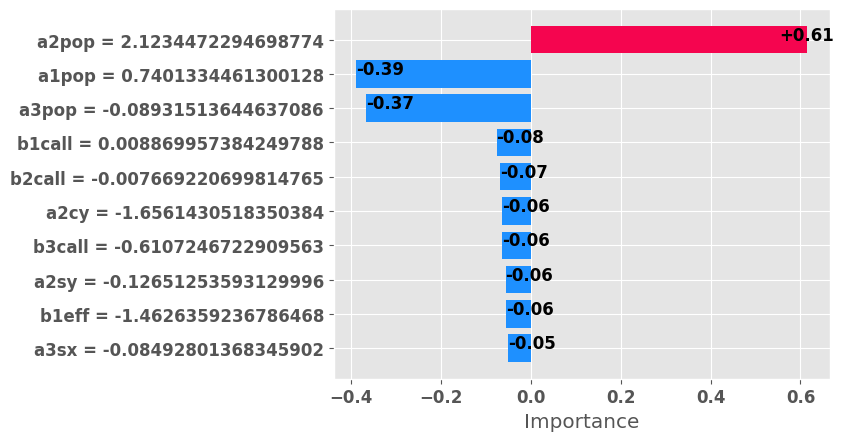

tensor([[0.3239]], grad_fn=<SigmoidBackward0>)

In [17]:
#num of features to use
top_n = 10

gnn_model.plot_bars(test[10][0].reshape(1, len(index_to_name)).to(device), test_data.iloc[0], top_n)
gnn_model.predict(test[10][0].reshape(1, len(index_to_name)).to(device))

# Interpretability Evaluation

In [18]:
'''function to obtain feature scores from IGNNet model'''

def get_local_values(example, index_to_name):
    array_to_use = np.array(example)    
    array = torch.FloatTensor(array_to_use).reshape(1, len(index_to_name))
    local_importance = gnn_model.get_local_importance(array.to(device))[-1]

    names = []
    values = []
    for i, v in enumerate(local_importance):
        name = index_to_name[i]
        names.append(name)
        values.append(v)
    return names, values

In [19]:
from sklearn.preprocessing import StandardScaler
from data_preprocess import BlackBoxWrapper


num_features = len(index_to_name)


bb = BlackBoxWrapper(gnn_model, num_features, device)

def black_box(x, S):
    pred = bb(x, S)
    return pred.cpu().data.numpy()

In [20]:
'''
Evaluate a black-box model.
  x: input examples.
  S: coalitions.
'''

x = test_dataset[0][0]
x = x.reshape((1,x.shape[0])).numpy()

'''compute the feature scores on a vector of all features masked'''
S = np.zeros_like(x)
_, null =  get_local_values(S, index_to_name)

In [21]:
null

[-0.1120305,
 -0.11327777,
 -0.045529064,
 -0.09360093,
 -0.14330241,
 -0.2974963,
 -0.12752435,
 -0.15266919,
 -0.07762538,
 -0.18613371,
 -0.14932077,
 -0.57877856,
 -0.13530391,
 -0.08698489,
 -0.07541362,
 -0.13599047,
 -0.0838942,
 -0.30649203,
 -0.08499193,
 -0.07318349,
 -0.08651951,
 -0.1298451,
 -0.1549896,
 -0.0916505,
 -0.14153172,
 -0.065582536,
 -0.045239247,
 -0.14952749,
 -0.10331124,
 -0.17542613,
 -0.09330843,
 -0.14889814]

## Explain 500 examples and compare KernelSHAP to IGNNet after each iteration of data sampling

In [22]:
from tqdm import tqdm
import shapreg
import pickle
import os.path
from numpy.linalg import norm
from scipy.stats import spearmanr
import copy

if os.path.isfile(f'{data_name}_exp.pickle'):
    print('Loading saved explanations')

    with open(f'{data_name}_exp.pickle', 'rb') as file:
        all_instance_results_loaded = pickle.load(file)
        
    all_l2_distances = []
    all_cos_sim = []
    all_spearman_c = []

    for x, all_results in tqdm(all_instance_results_loaded):

        _, true_values = get_local_values(x, feature_global_importance, adj_matrix, index_to_name)
        
        instance_l2_dis = []
        instance_cos_sim = []
        spearman_c = []
        
        '''the Shapley values for an input x sum to the difference p(y=1 | x) - p(y=1)'''
        true_values = np.array(true_values) - null

        for i in list(all_results['iters']):

            knl_shp = all_results['values'][list(all_results['iters']).index(i)].reshape(-1)

            instance_l2_dis.append(norm(true_values - knl_shp))
            instance_cos_sim.append(np.dot(true_values, knl_shp)/(norm(true_values)*norm(knl_shp)))
            coef, p = spearmanr(true_values, knl_shp)
            spearman_c.append(coef)
            
        all_l2_distances.append(instance_l2_dis)
        all_cos_sim.append(instance_cos_sim)
        all_spearman_c.append(spearman_c)

else:
    
    all_l2_distances = []
    all_cos_sim = []
    all_instance_results = []
    all_spearman_c = []

    count = 1
    for x_, _ in tqdm(test_dataset):
        _, true_values = get_local_values(x_, index_to_name)

        x = x_.reshape((1,x_.shape[0])).numpy()

        # Run KernelSHAP to convergence
        game_ = shapreg.games.PredictionGame(black_box, x)
        try:
            '''more examples are available here'''
            shap_values, all_results = shapreg.shapley.ShapleyRegression(
                game_, batch_size=32, n_samples=3000, paired_sampling=True, detect_convergence=False,
                bar=False, return_all=True)
        except:
            print('Singularity exception!')
            continue

        instance_l2_dis = []
        instance_cos_sim = []
        spearman_c = []

        true_values = np.array(true_values) #- null

        for i in list(all_results['iters']):

            knl_shp = all_results['values'][list(all_results['iters']).index(i)].reshape(-1)

            instance_l2_dis.append(norm(true_values - knl_shp))
            instance_cos_sim.append(np.dot(true_values, knl_shp)/(norm(true_values)*norm(knl_shp)))
            coef, p = spearmanr(true_values, knl_shp)
            spearman_c.append(coef)
            
        all_l2_distances.append(instance_l2_dis)
        all_cos_sim.append(instance_cos_sim)
        all_spearman_c.append(spearman_c)

        all_instance_results.append((copy.deepcopy(x_), copy.deepcopy(all_results)))
        
        count += 1
        if count > 50:
            break
    print('saving explanations')

    #with open(f'{data_name}_exp.pickle', 'wb') as file:
    #    pickle.dump(all_instance_results, file)


  2%|█▏                                                                             | 19/1229 [03:38<4:01:25, 11.97s/it]

Singularity exception!


  4%|███▏                                                                           | 50/1229 [09:10<3:36:11, 11.00s/it]

saving explanations


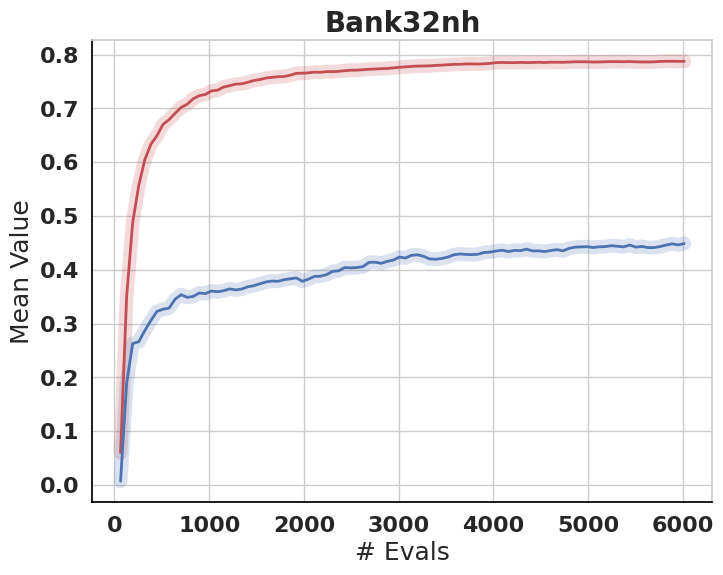

In [24]:


'''Plot the computed similarity scores'''

mean_cos_sim = np.mean(all_cos_sim, axis=0)
mean_spearman_c = np.mean(all_spearman_c, axis=0)



import matplotlib.pyplot as plt  
# Plot the line graph
import seaborn as sb
sb.set(rc={'figure.figsize':(8,6)})
sb.set_theme(style='whitegrid')

plt.plot(all_results['iters'], mean_cos_sim, "r-", linewidth=10, alpha=0.2)
plt.plot(all_results['iters'], mean_spearman_c, "b-", linewidth=10, alpha=0.2)

plt.plot(all_results['iters'], mean_cos_sim, "r-", label='Cosine Similarity', linewidth=2)
plt.plot(all_results['iters'], mean_spearman_c, "b-", label='Spearman Correlation', linewidth=2)

# Add labels and title
plt.xlabel('# Evals', fontsize=18)
plt.ylabel('Mean Value', fontsize=18)
plt.title('Bank32nh', fontsize=20, fontweight='bold')
#plt.legend(fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


ax = plt.gca()

ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

# Display the graph
plt.show()

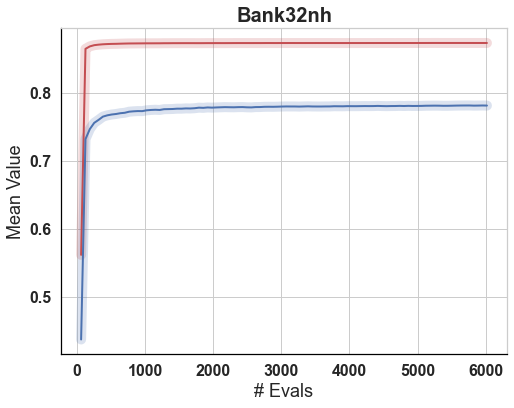

In [27]:


'''Plot the computed similarity scores'''

mean_cos_sim = np.mean(all_cos_sim, axis=0)
mean_spearman_c = np.mean(all_spearman_c, axis=0)

import matplotlib.pyplot as plt  
# Plot the line graph
import seaborn as sb
sb.set(rc={'figure.figsize':(8,6)})
sb.set_theme(style='whitegrid')

plt.plot(all_results['iters'], mean_cos_sim, "r-", linewidth=10, alpha=0.2)
plt.plot(all_results['iters'], mean_spearman_c, "b-", linewidth=10, alpha=0.2)

plt.plot(all_results['iters'], mean_cos_sim, "r-", label='Cosine Similarity', linewidth=2)
plt.plot(all_results['iters'], mean_spearman_c, "b-", label='Spearman Correlation', linewidth=2)

# Add labels and title
plt.xlabel('# Evals', fontsize=18)
plt.ylabel('Mean Value', fontsize=18)
plt.title('Bank32nh', fontsize=20, fontweight='bold')
#plt.legend(fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


ax = plt.gca()

ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

# Display the graph
plt.show()